# Lab 03 - Ajuste de Curvas

**3.1 - Modelo matemático do neurônio:**

Regressão linear ou ajuste de curvas é amplamente utilizada na estatítica e aprendizagem de máquinas, principalmente para análises preditivas, como estimativas de tendências, etc.

A forma mais elementar consiste, basicamente, no ajuste de uma reta da forma,

\begin{equation}
y = a_0 + a_1x
\end{equation}

a uma conjunto de pares ordenados $(x_k,y_k)_{k=1}^n$. No entanto, existem inúmeras possibilidades de ajuste, tais como:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


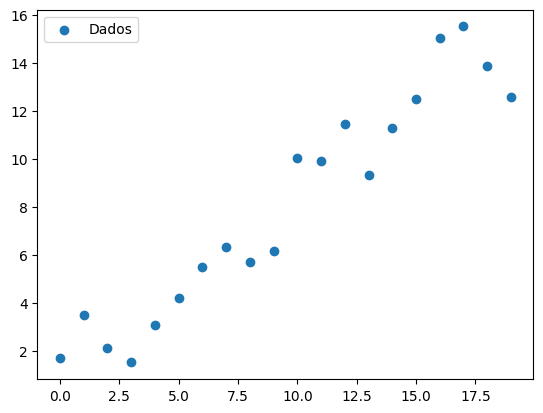

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

x = np.arange(0,20)
y1 = np.random.uniform(low=1, high=4, size=(5,))
y2 = np.random.uniform(low=4, high=8, size=(5,))
y3 = np.random.uniform(low=8, high=12, size=(5,))
y4 = np.random.uniform(low=12, high=16, size=(5,))
y = np.concatenate([y1,y2,y3,y4],axis = 0)

plt.scatter(x,y, label = 'Dados')
plt.legend()
plt.show()

A pergunta natural que surge é: Qual reta melhor se ajusta ao conjunto de pontos?

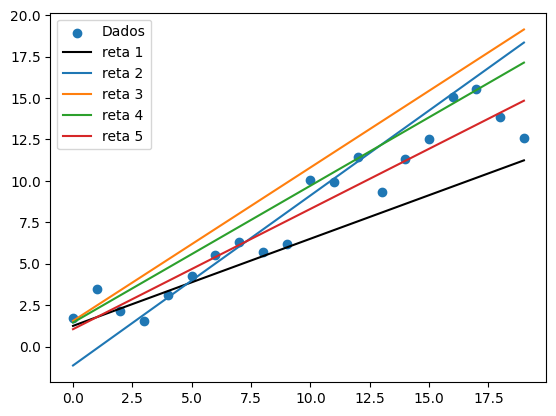

In [2]:
ya1 = 1.045 + 0.7259*x
ya2 = 1.445 + 0.8259*x
ya3 = 1.545 + 0.9259*x
ya4 = -1.145 + 1.0259*x
ya5 = 1.245 + 0.5259*x

plt.scatter(x,y, label = 'Dados')
plt.plot(x,ya5,'k',label='reta 1')
plt.plot(x,ya4,label='reta 2')
plt.plot(x,ya3,label='reta 3')
plt.plot(x,ya2,label='reta 4')
plt.plot(x,ya1,label='reta 5')
plt.legend()
plt.show()

Para responder a pergunta iremos considerar o funcional de custo,
baseado no erro quadrático obtido entre cada amostra e a reta a ser analisada. Ou seja,
\begin{equation}
J_e = \sum_{k=1}^n \left ( y_k - (a_0 + a_1x_k) \right )^2
\end{equation}

Para minimizar o erro, tomamos as derivadas com relação a $a_0$ e $a_1$, buscamos os pontos onde elas se anulam. Ou seja, o ponto de mínimo da função. Que correspondem a resolução do seguinte SEL:
\begin{equation}
\begin{bmatrix}
n & \sum_{k=1}^n x_k\\
\sum_{k=1}^n x_k & \sum_{k=1}^n \left ( x_k^2 \right )
\end{bmatrix}\begin{bmatrix}
a_0\\
a_1
\end{bmatrix} = \begin{bmatrix}
\sum_{k=1}^n y_k\\
\sum_{k=1}^n x_ky_k
\end{bmatrix}
\end{equation}

In [3]:
A = np.array([[len(x),sum(x)],[sum(x), sum(x*x)]])
b = [sum(y),sum(x*y)]
w = la.solve(A,b)
print('O modelo ajustado é :\n y_est = %.4f'%w[0],'+ %.4f'%w[1],'x')

O modelo ajustado é :
 y_est = 0.9701 + 0.7482 x


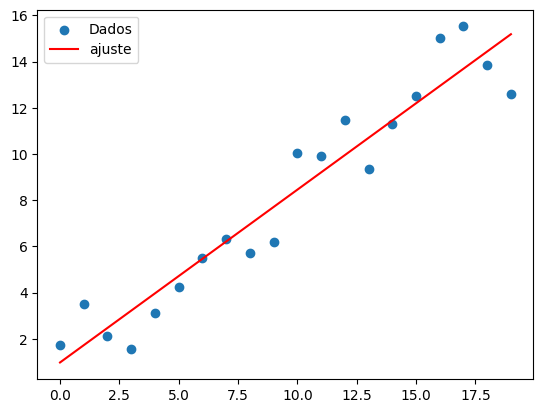

In [4]:
plt.scatter(x,y, label = 'Dados')
y_est = w[0] + w[1]*x
plt.plot(x,y_est,'r',label = 'ajuste')
plt.legend()
plt.show()

**3.2 - Caso geral**

Se o modelo que desejamos ajustar for uma combinação linear de várias funções $g_i(x)$ com $i = 1, \cdots, n$ na forma:
$$
y \approx f(x) = \sum_{k=0}^n w_k\,g_k(x) = w_0\,g_0(x) + w_1\,g_1(x) + \cdots + w_n\,g_n(x),
$$
onde $w_i,\;i = 1, \cdots, n$ são os parâmetros desconhecidos e, as $g_i,\;i = 1, \cdots, n$ são as funções de base. Por meio de:
$$
\begin{bmatrix}
\left \langle g_0(x),g_0(x) \right \rangle & \left \langle g_0(x),g_1(x) \right \rangle  & \cdots & \left \langle g_0(x),g_n(x) \right \rangle \\
\left \langle g_1(x),g_0(x) \right \rangle & \left \langle g_1(x),g_1(x) \right \rangle  & \cdots & \left \langle g_1(x),g_n(x) \right \rangle \\  
\vdots & \cdots & \ddots & \vdots\\
\left \langle g_n(x),g_0(x) \right \rangle & \left \langle g_n(x),g_1(x) \right \rangle  & \cdots & \left \langle g_n(x),g_n(x) \right \rangle
\end{bmatrix}\begin{bmatrix}
w_0\\
w_1\\
\vdots\\
w_n
\end{bmatrix} = \begin{bmatrix}
\left \langle y,g_0(x) \right \rangle\\
\left \langle y,g_1(x) \right \rangle\\  
\vdots\\
\left \langle y,g_n(x) \right \rangle\\
\end{bmatrix}
$$

**Exemplo 01 :** Sejam $x,\,y$ o seguinte conjunto de pontos:

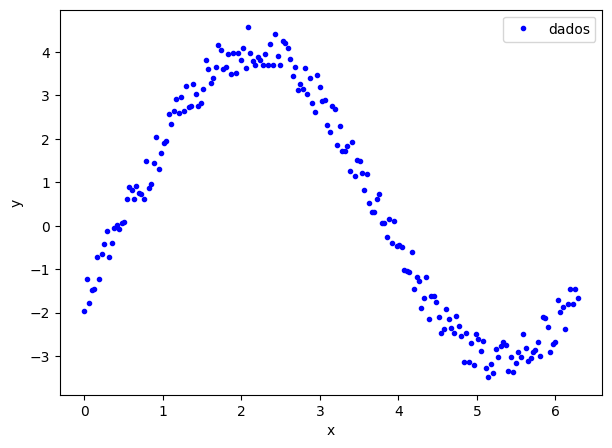

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 200)
y = 3*np.sin(x) - 2*np.cos(x) + np.random.random(len(x))
plt.figure(figsize = (7, 5))
plt.plot(x,y,"b.", label = "dados")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

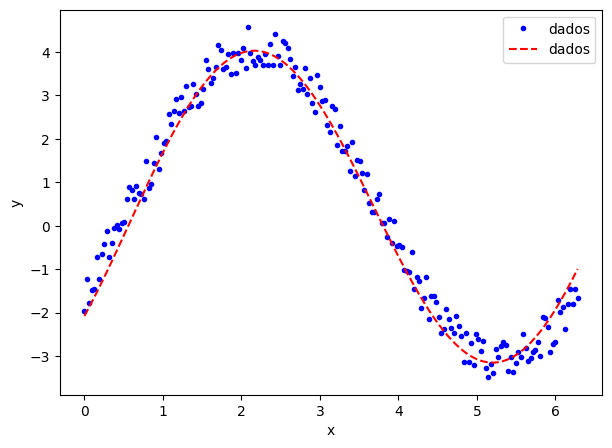

[[ 3.30457703]
 [-2.07635268]
 [ 0.02743515]]


In [6]:
g0 = np.sin(x)
g1 = np.cos(x)
g2 = x**2

G = np.array([[sum(g0*g0),sum(g0*g1),sum(g0*g2)],
              [sum(g1*g0),sum(g1*g1),sum(g1*g2)],
              [sum(g2*g0),sum(g2*g1),sum(g2*g2)]])


F = np.array([[sum(y*g0)],[sum(y*g1)],[sum(y*g2)]])



w = (la.inv(G)) @ F


fx = w[0]*g0 + w[1]*g1 + w[2]*g2

plt.figure(figsize = (7, 5))
plt.plot(x,y,"b.", label = "dados")
plt.plot(x,fx,"--r", label = "dados")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

print(w)



Ajuste os dados por meio da seguinte função: $f(x) = w_0 + w_1\,sen(x) + w_2\,cos(x).$

O modelo ajustado é f(x) = 0.4736 + 2.9598 sen(x) + -1.9670 cos(x)


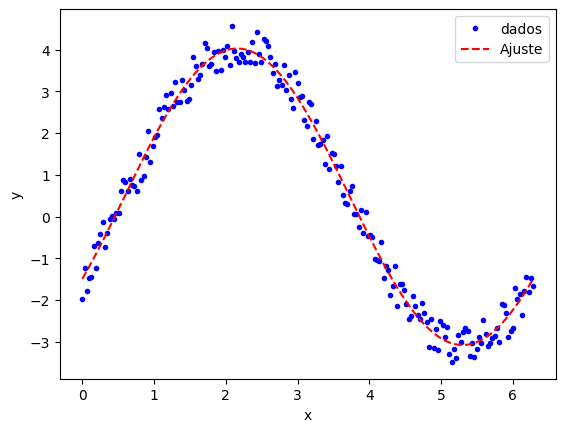

In [7]:
g0 = np.ones(len(x))
g1 = np.sin(x)
g2 = np.cos(x)

G = np.array([[sum(g0*g0), sum(g0*g1), sum(g0*g2)],
              [sum(g1*g0), sum(g1*g1), sum(g1*g2)],
              [sum(g2*g0), sum(g1*g2), sum(g2*g2)]])
b = np.array([[sum(y*g0)], [sum(y*g1)], [sum(y*g2)]])

w = la.solve(G,b)

xx = np.linspace(0, 2*np.pi, 1000)
y_est = w[0] + w[1]*np.sin(xx) + w[2]*np.cos(xx)

print('O modelo ajustado é f(x) = %.4f + %.4f sen(x) + %.4f cos(x)'%(w[0],w[1],w[2]))

plt.plot(x,y,"b.", label = 'dados')
plt.plot(xx,y_est,"--r", label = 'Ajuste')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
import pandas as pd


dataFrame = pd.read_csv('./drive/MyDrive/CN/ProjetoCN/Dados/Dados1.csv')


t = dataFrame.iloc[:,0]
ut = dataFrame.iloc[:,1]
yt = dataFrame.iloc[:,2]

c = np.linspace(t[1],t[499],4)

phi = np.zeros(shape = (len(t),len(c)))

s2 = 19

for k in range(len(x)):
    for i in range(len(c)):
        phi[k,i] = np.exp(-(1/(2*(s2**2)))*(x[k] - c[i])**2)

w = (la.inv(phi.T@phi)@(phi.T)) @ yt

y_est = (phi)@w

EMQ = (1/len(t))*(sum((yt - y_est)**2))
print("O Erro médio quadrático (EMQ) = %.4f" %EMQ)

plt.scatter(t,yt, label = 'Dados')
plt.plot(t,y_est,"--r",label = 'Ajuste')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


print(w)



FileNotFoundError: ignored

**3.3  - Adapte o problema, utilizando o conceito de funções de base radial - RBF**.

O Erro médio quadrático (EMQ) = 0.1059


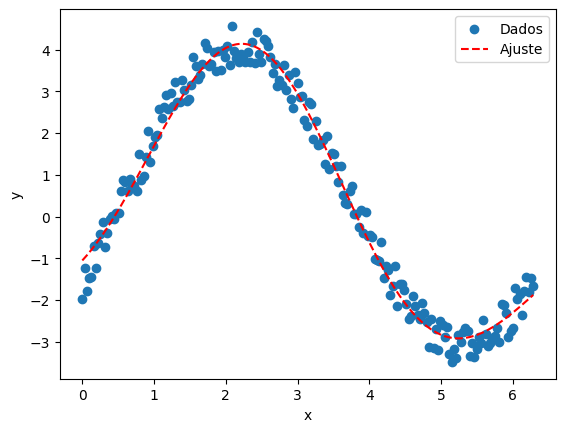

In [10]:

import numpy as np
c = np.linspace(0,7,4)




phi = np.zeros(shape = (len(x),len(c)))

s2 = 1.5

for k in range(len(x)):
    for i in range(len(c)):
        phi[k,i] = np.exp(-(1/(2*(s2**2)))*(x[k] - c[i])**2)


w = np.dot(la.pinv(phi),y)

y_est = (phi)@w

EMQ = (1/len(x))*(sum((y - y_est)**2))
print("O Erro médio quadrático (EMQ) = %.4f" %EMQ)


plt.scatter(x,y, label = 'Dados')
plt.plot(x,y_est,"--r",label = 'Ajuste')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()



**3.4 - Ajuste Trigonométrico - Expansão em Séries de Fourier.**

**Exemplo 03** - Expanda, utilizando séries de Fourier, a função $f(x) = |x|$ no intervalo de $-\pi \leq x < \pi.$